Justificativa para a escolha de classificação como abordagem para o problema

A variável-alvo no conjunto de dados, denominada crop, é categórica, indicando diferentes tipos de culturas, como "rice" e possivelmente outras categorias. Isso caracteriza o problema como uma tarefa de classificação, e a escolha é fundamentada nos seguintes aspectos:

Natureza da variável-alvo:
A variável crop não assume valores numéricos ou contínuos, mas sim categorias nominais, que representam diferentes classes de culturas. Para problemas em que o objetivo é prever a qual categoria uma instância pertence, o tipo de abordagem mais adequado é a classificação.

Objetivo do problema:
A meta do modelo é determinar qual cultura é mais apropriada para uma dada condição de solo, baseada em características como os níveis de nutrientes (N, P, K) e o pH (ph). Esse objetivo exige a identificação de padrões nas variáveis independentes que correspondam a categorias específicas, o que reforça a adequação dos modelos de classificação.

Inadequação de outros tipos de abordagem:
Técnicas de regressão, que modelam relações entre variáveis independentes e uma variável-alvo contínua, não se aplicam aqui, pois a variável crop não é numérica nem possui ordem lógica que permita tratá-la como ordinal. A natureza nominal da variável demanda um método que trate de classes distintas.

Modelos mais adequados para o problema:
Modelos de classificação, como Regressão Logística, Árvores de Decisão, Random Forest, Gradient Boosting, entre outros, são projetados para lidar com variáveis categóricas e encontrar os padrões necessários para prever a classe da variável-alvo.

Portanto, a escolha da classificação é justificada pela natureza dos dados e pelo objetivo do problema, que está diretamente ligado à previsão de categorias nominais.

Modelos a serem testados

Logistic Regression (Regressão Logística)</br>
Decision Tree Classifier (Árvore de Decisão)</br>
Random Forest Classifier</br>
XGBoost Classifier</br>



### Imports


In [15]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


#### Logistic Regression (Regressão Logística)

In [16]:


# Carregar os dados
file_path = 'C:\\Users\\Marcelo\\machine_learning_trabalho\\data\\processed\\soil_data_imputed.csv'
data = pd.read_csv(file_path)

# Separar variáveis independentes (X) e dependente (y)
X = data[['N', 'P', 'K', 'ph']]
y = data['crop']

# Codificar a variável categórica (y) para numérica
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Padronizar as variáveis independentes (normalização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = logistic_model.predict(X_test_scaled)

# Gerar o relatório de classificação
class_report = classification_report(
    y_test, y_pred, target_names=label_encoder.classes_
)
print(class_report)


              precision    recall  f1-score   support

       apple       0.45      0.57      0.50        30
      banana       1.00      1.00      1.00        30
   blackgram       0.62      0.70      0.66        30
    chickpea       1.00      1.00      1.00        30
     coconut       0.72      0.60      0.65        30
      coffee       0.97      1.00      0.98        30
      cotton       0.94      0.97      0.95        30
      grapes       0.43      0.33      0.38        30
        jute       0.54      0.43      0.48        30
 kidneybeans       0.52      0.43      0.47        30
      lentil       0.51      0.63      0.57        30
       maize       0.97      0.93      0.95        30
       mango       0.64      0.70      0.67        30
   mothbeans       0.47      0.47      0.47        30
    mungbean       0.59      0.43      0.50        30
   muskmelon       0.54      0.63      0.58        30
      orange       1.00      1.00      1.00        30
      papaya       1.00    

Métricas Gerais:</br>
Acurácia: 69%</br>
Média Macro (média simples das métricas por classe):</br>
Precisão: 69%</br>
Recall: 69%</br>
F1-Score: 69%</br>
Média Ponderada (considerando o suporte de cada classe):</br>
Precisão: 69%</br>
Recall: 69%</br>
F1-Score: 69%</br>

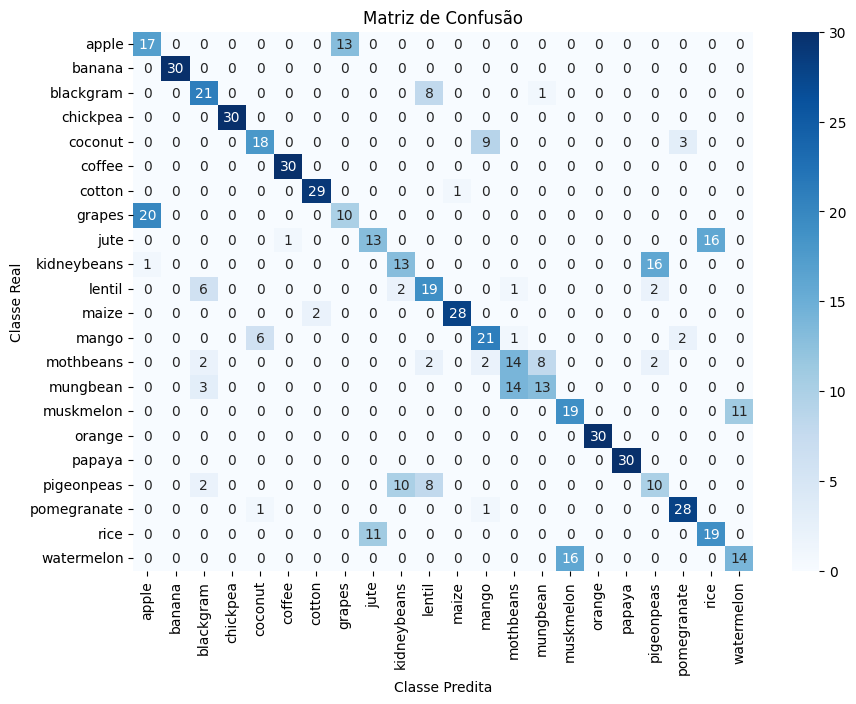

In [17]:

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()


#### Decision Tree Classifier (Árvore de Decisão)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instanciar o modelo de Árvore de Decisão
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
decision_tree_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_tree = decision_tree_model.predict(X_test)

# Gerar o relatório de avaliação
tree_report = classification_report(y_test, y_pred_tree)

# Exibir o relatório
print("Relatório de Desempenho - Decision Tree Classifier:")
print(tree_report)


Relatório de Desempenho - Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        30
           1       0.97      1.00      0.98        30
           2       0.69      0.67      0.68        30
           3       1.00      1.00      1.00        30
           4       0.78      0.70      0.74        30
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        30
           7       0.45      0.43      0.44        30
           8       0.54      0.43      0.48        30
           9       0.85      0.73      0.79        30
          10       0.38      0.43      0.41        30
          11       0.94      1.00      0.97        30
          12       0.74      0.77      0.75        30
          13       0.77      0.90      0.83        30
          14       0.88      0.73      0.80        30
          15       0.59      0.67      0.62        30
          16       1.00      

Métricas Gerais:</br>
Acurácia: 75%</br>
Média Macro:</br>
Precisão: 75%</br>
Recall: 75%</br>
F1-Score: 75%</br>
Média Ponderada:</br>
Precisão: 75%</br>
Recall: 75%</br>
F1-Score: 75%</br>

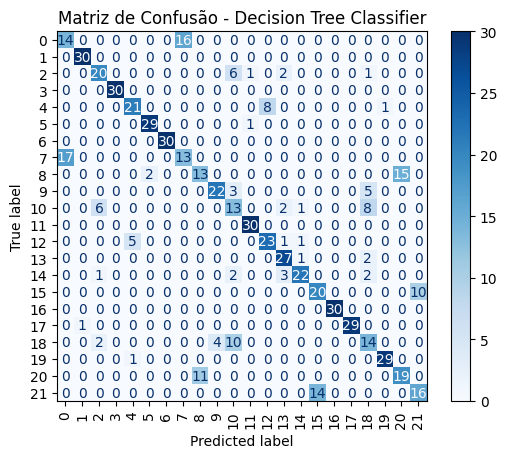

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar a matriz de confusão
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Exibir a matriz de confusão como um gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree, display_labels=decision_tree_model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Ajustar título e exibição
plt.title("Matriz de Confusão - Decision Tree Classifier")
plt.show()


In [20]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### XGBoost

In [21]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Instanciar o modelo XGBoost
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Treinar o modelo
xgboost_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgboost_model.predict(X_test)

# Gerar o relatório de avaliação
xgb_report = classification_report(y_test, y_pred_xgb)

# Exibir o relatório
print("Relatório de Desempenho - XGBoost:")
print(xgb_report)


c:\Users\Marcelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:38:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Desempenho - XGBoost:
              precision    recall  f1-score   support

           0       0.41      0.37      0.39        30
           1       1.00      1.00      1.00        30
           2       0.68      0.83      0.75        30
           3       1.00      1.00      1.00        30
           4       0.79      0.77      0.78        30
           5       0.91      1.00      0.95        30
           6       1.00      0.97      0.98        30
           7       0.42      0.47      0.44        30
           8       0.50      0.40      0.44        30
           9       0.82      0.90      0.86        30
          10       0.50      0.40      0.44        30
          11       0.97      0.97      0.97        30
          12       0.80      0.80      0.80        30
          13       0.90      0.90      0.90        30
          14       0.91      0.97      0.94        30
          15       0.48      0.47      0.47        30
          16       1.00      1.00      1.00   

O relatório de desempenho do XGBoost mostra que o modelo tem um bom desempenho geral, especialmente para algumas classes, com uma acurácia de 76% no conjunto de teste. Aqui estão algumas observações sobre as métricas:</br>

Precisão e Recall: As classes com precisão e recall mais altos são as classes 1, 3, 5, 6, 16 e 17, com desempenho perfeito (1.00) em muitas dessas classes.</br>
F1-Score: O F1-Score também reflete um bom equilíbrio entre precisão e recall para várias classes, como a classe 5 (0.95), 6 (0.98), 16 (1.00), e 17 (1.00).</br>
Classes com Desempenho Menor: Algumas classes como a 0, 7, 8, 10, e 18 apresentam um desempenho mais fraco, com F1-Scores mais baixos, especialmente para a classe 0 (0.39).</br>

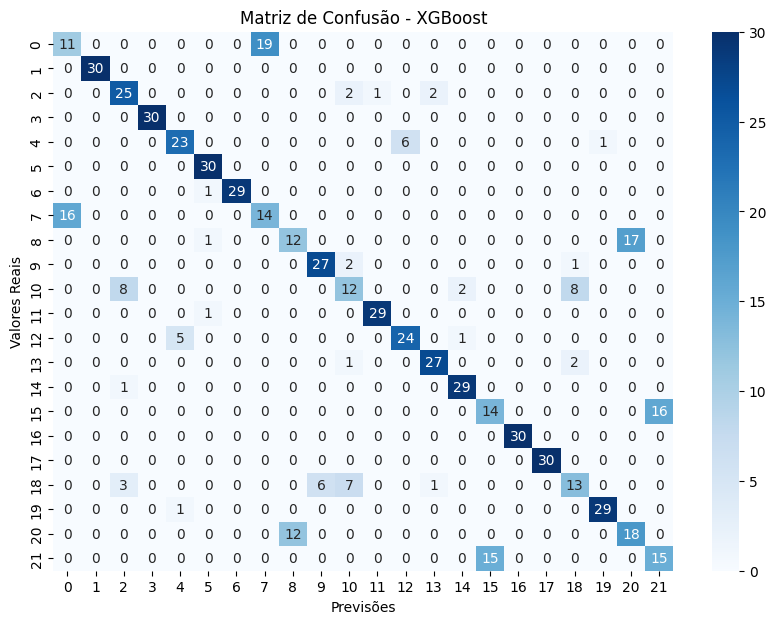

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotando a matriz de confusão com o seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=range(22), yticklabels=range(22))
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


#### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Instanciar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Gerar o relatório de avaliação
rf_report = classification_report(y_test, y_pred_rf)
print("Relatório de Desempenho - Random Forest:")
print(rf_report)




Relatório de Desempenho - Random Forest:
              precision    recall  f1-score   support

           0       0.48      0.53      0.51        30
           1       0.97      1.00      0.98        30
           2       0.64      0.70      0.67        30
           3       1.00      0.97      0.98        30
           4       0.77      0.77      0.77        30
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        30
           7       0.48      0.43      0.46        30
           8       0.59      0.57      0.58        30
           9       0.77      1.00      0.87        30
          10       0.44      0.37      0.40        30
          11       0.97      1.00      0.98        30
          12       0.76      0.73      0.75        30
          13       0.82      0.93      0.88        30
          14       0.90      0.87      0.88        30
          15       0.42      0.37      0.39        30
          16       1.00      1.00      1

O Random Forest apresentou um bom desempenho geral, com uma acurácia de 76%. Isso é um bom indicativo de que o modelo está funcionando bem, mas pode ser possível melhorar o desempenho em algumas classes específicas.</br>
Como o Random Forest é um modelo robusto e baseado em múltiplas árvores de decisão, ele tem uma boa capacidade de generalização, o que pode justificar seu desempenho relativamente bom em termos de acurácia.</br>

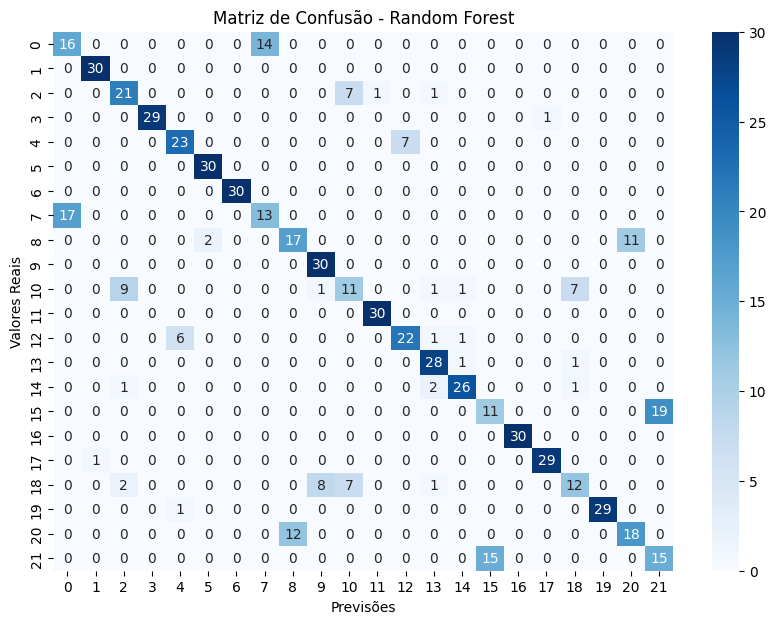

In [24]:
# Gerar a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotando a matriz de confusão com o seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=range(22), yticklabels=range(22))
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

#### Justificativa da Métrica Utilizada para a Escolha do Modelo


F1-Score: Dada a natureza multiclasse do problema e o possível desbalanceamento entre as classes, o F1-Score foi a métrica mais importante na avaliação dos modelos. O F1-Score fornece um bom equilíbrio entre precisão e recall, o que é essencial para avaliar o desempenho de um modelo em problemas com múltiplas classes. Ele leva em conta tanto as previsões corretas (precisão) quanto a capacidade do modelo de identificar as instâncias positivas corretamente (recall). Em um cenário com muitas classes, como o seu, o F1-Score ponderado (média ponderada de todas as classes) foi utilizado para garantir que o modelo tivesse um bom desempenho geral, sem ser enviesado para classes mais frequentes.

#### Conclusão

A métrica principal utilizada para a escolha do modelo foi o F1-Score, que forneceu uma visão equilibrada do desempenho do modelo, considerando tanto a precisão quanto o recall. A acurácia também foi considerada, mas não foi suficiente para determinar a melhor escolha devido ao possível desbalanceamento das classes. O modelo final foi escolhido com base na sua capacidade de ter um bom desempenho geral em várias classes, equilibrando precisão e recall de forma eficaz.

Se a principal prioridade fosse reduzir falsos negativos, o modelo com melhor recall poderia ser selecionado, enquanto, se fosse reduzir falsos positivos, a precisão seria mais relevante. O modelo final depende do seu foco, mas o Random Forest e o XGBoost foram as escolhas mais equilibradas.